In [48]:
from sklearn.datasets import load_boston
from sklearn import metrics # to cal mean median etc
import numpy as np
import pandas as pd #to convert dataset to dataframe
data=load_boston()
boston=pd.DataFrame(data.data,columns=data.feature_names)
print(data.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [49]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
boston['Price']=data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [52]:
boston.shape

(506, 14)

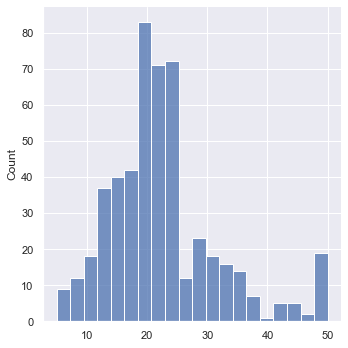

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(7,5)})
sns.displot(data.target,bins=20) # bins is used for size of diagram
plt.show()

<AxesSubplot:>

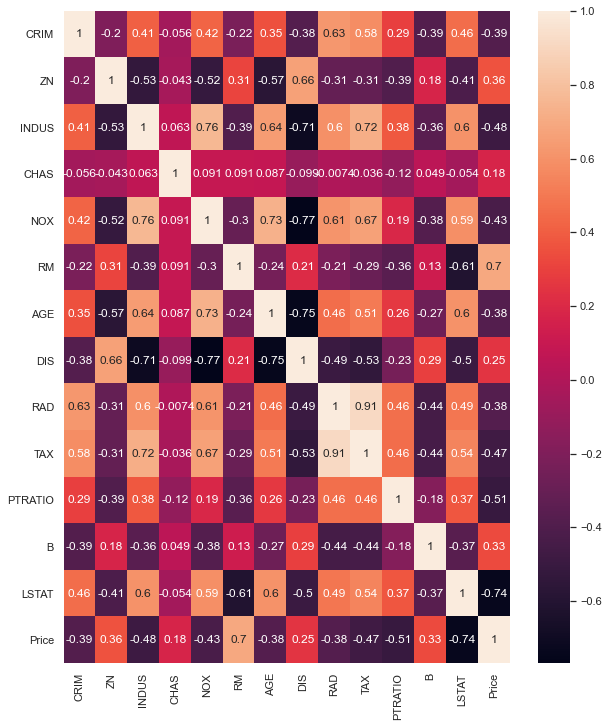

In [54]:
corr=boston.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

# Linear regression continue with EDA progam

In [57]:
from sklearn.linear_model import LinearRegression
a=LinearRegression()
from sklearn.model_selection import train_test_split
target=boston['Price'].values
features=boston.drop(['Price'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,train_size=0.6)
print(len(x_train))
print(len(x_test))

303
152


In [58]:
a.fit(x_train,y_train)
a.score(x_test,y_test)
y_pred=a.predict(x_test)

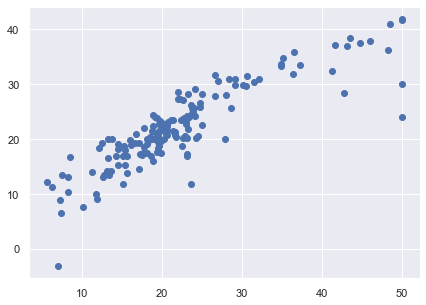

In [59]:
plt.scatter(y_test,y_pred)

In [68]:
lreg_coff=pd.DataFrame()
lreg_coff['columns']=data.feature_names
lreg_coff['coeff estimate']=pd.Series(a.coef_)
print(lreg_coff)
print("intercept:",a.intercept_)


    columns  coeff estimate
0      CRIM       -0.129066
1        ZN        0.045448
2     INDUS       -0.026008
3      CHAS        1.024653
4       NOX      -17.918385
5        RM        3.327972
6       AGE        0.016037
7       DIS       -1.416172
8       RAD        0.312200
9       TAX       -0.013677
10  PTRATIO       -0.920075
11        B        0.008826
12    LSTAT       -0.477088
intercept: 38.40487279527319


In [69]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)
r2=r2_score(y_test,y_pred)
print(r2)
print(mean_squared_error(y_test,y_pred))

22.511136842713245
0.7545915467669366
22.511136842713245
